In [114]:
import gp
import numpy as np
from importlib import reload
import h5py
import matplotlib.pylab as plt
reload(gp)

<module 'gp' from '/home/luca/source/GP3/python/gp.py'>

In [115]:
geo=gp.geometry(shape=(128,128,128),domain=[ [-5,5 ],[-5,5],[-5,5]]  )
r2=geo.positions(axis=0)**2 + geo.positions(axis=1)**2 + geo.positions(axis=2)**2 
phi=np.exp(-r2)

In [116]:
wave=gp.wavefunction(geo,phi)
wave.saveHDF5("gaussian.hdf5")

In [117]:
class box:
    def __init__(self,limits):
        '''
        Takes into input a list of integers pairs  {(low,high) }_i , i=0:D with D the number of dimensions
        '''
        self.dimensions=len(limits)
        self.lower_edges=[ lim[0] for lim in limits]
        self.upper_edges=[ lim[1] for lim in limits]
        self.limits=limits
        self.shape=[self.upper_edges[d] - self.lower_edges[d] +1 for d in range(self.dimensions)] 
        
class boxArray:
    def __init__(self,boxes):
        self.box=boxes
    def __len__():
        return len(self.box)


class geometry:
    def __init__(self,shape,domain,symmetry="none",coordinates="cartesian",bc=None,grown_shape=None):
        '''
        Creates the geometry of a cell centered grid. Does not store fields.
        '''

        self.shape=shape
        self.lower_edges= np.array([float(bound[0]) for bound in domain])
        self.upper_edges= np.array([float(bound[1]) for bound in domain])

        self.step = [ (h - l)/n for l,h,n in zip(self.lower_edges,self.upper_edges,self.shape) ]
        self.dimensions=len(shape)
        self.symmetry=symmetry
        self.coordinates=coordinates
        self.bc=bc
        if grown_shape is None:
            grown_shape=shape
        self.grown_shape=grown_shape
    def domainBox(self):
        limits=[(0,self.shape[d] - 1 ) for d in range(self.dimensions)]
        selectionBox=box(limits)
        return selectionBox    
    def toJson():
        
        domain=[ [ self.lower_edges[d],self.upper_edges[d]] for d in range(dimensions) ]
        return {
                "domain" : domain
                "shape" : shape
                }
                
               
        
    def positions(self,axis,selectionBox=None):
        
        if selectionBox is None:
            selectionBox=self.domainBox()
            
        
        iRange=np.arange(selectionBox.lower_edges[axis],selectionBox.upper_edges[axis]+1,1)
        x=(iRange + 0.5 )*self.step[axis]  + self.lower_edges[axis]
        
        if self.dimensions == 1 :
            return x

        if self.dimensions == 2:
            if axis==0:
                return np.outer(x,np.ones(shape=(box.shape[1])))
            else :
                    if axis==1:
                        return np.outer(np.ones(shape=box.shape[0]),x)

        if self.dimensions == 3 :
                if axis == 0:
                    return np.outer(x,np.ones(shape=(selectionBox.shape[1],selectionBox.shape[2]))).reshape(selectionBox.shape)
                else:
                    if axis == 1:
                        tmp=np.outer(x,np.ones(shape=(selectionBox.shape[2])))
                        return np.outer(np.ones(shape=(selectionBox.shape[0])),tmp).reshape(selectionBox.shape)
                    else:
                        if axis == 2:
                            return  np.outer(np.ones(shape=(selectionBox.shape[0],selectionBox.shape[1])),x).reshape(selectionBox.shape)

        

<IPython.core.display.Javascript object>


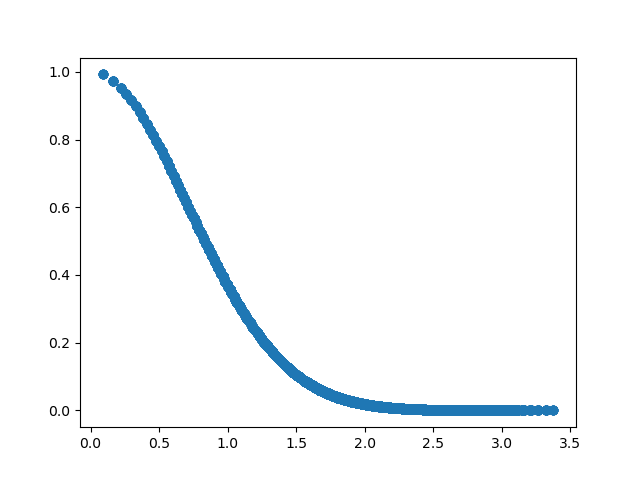

In [127]:
%matplotlib notebook
geo=geometry((40,40,40),[(-2,2),(-2,2),(-2,2)])
r2=geo.positions(0)**2 + geo.positions(1)**2 + geo.positions(2)**2
y=np.exp(-r2)
plt.plot(np.sqrt(r2).flatten(),y.flatten(),"o")